In [34]:
library(stringr)
library(dplyr)
library(ggplot2)
library(zoo)
library(data.table)
files <- list.files(path = "/home/rongxin/data/sync/trump-exposure/scripts/media-cloud-search/data/stories/by.ids/li qiang/", pattern = ".csv", full.names = TRUE)

data <- NULL
for (file in files) {
    tmp <- fread(file)
    data <- rbind(data, tmp)
}
data$indexed_date <- as.Date(data$indexed_date)
data$publish_date <- as.Date(data$publish_date)
head(data, 3)


id,media_name,media_url,title,publish_date,url,language,indexed_date
<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<date>
8098d64c93b4d4435d0d085da2cf73904d673caf8040a5c646ee591b82eee756,newyorker.com,newyorker.com,"Damien Chazelle’s “Babylon” Goes Nowhere, in a Mad Rush",2023-01-02,https://www.newyorker.com/magazine/2023/01/02/damien-chazelles-babylon-goes-nowhere-in-a-mad-rush,en,2024-04-26
4cdde98c2685ccd61d77d82ebb7bc9744e4351afb11d3ef8949d83f4fa361e57,cbsnews.com,cbsnews.com,Kathy Hochul sworn in as governor of New York,2023-01-02,https://www.cbsnews.com/newyork/video/kathy-hochul-sworn-in-as-governor-of-new-york/,en,2024-03-10
54b93700a530babdd866e82c544ae9b3a9e9dfc109c2ad88266c0007bc2c5960,cbsnews.com,cbsnews.com,NYPD searching for 2 drivers in Queens hit-and-run,2023-01-02,https://www.cbsnews.com/newyork/video/nypd-searching-for-2-drivers-in-queens-hit-and-run/,en,2024-03-10


In [60]:
data.plot <- data %>%
    group_by(publish_date) %>%
    summarise(count = n()) %>%
    na.omit()
data.plot$rolling_avg <- rollmean(data.plot$count, 7, fill = NA)
head(data.plot, 3)


publish_date,count,rolling_avg
<date>,<int>,<dbl>
2023-01-02,33,NA
2023-01-03,51,NA
2023-01-04,56,NA


Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_line()`).”


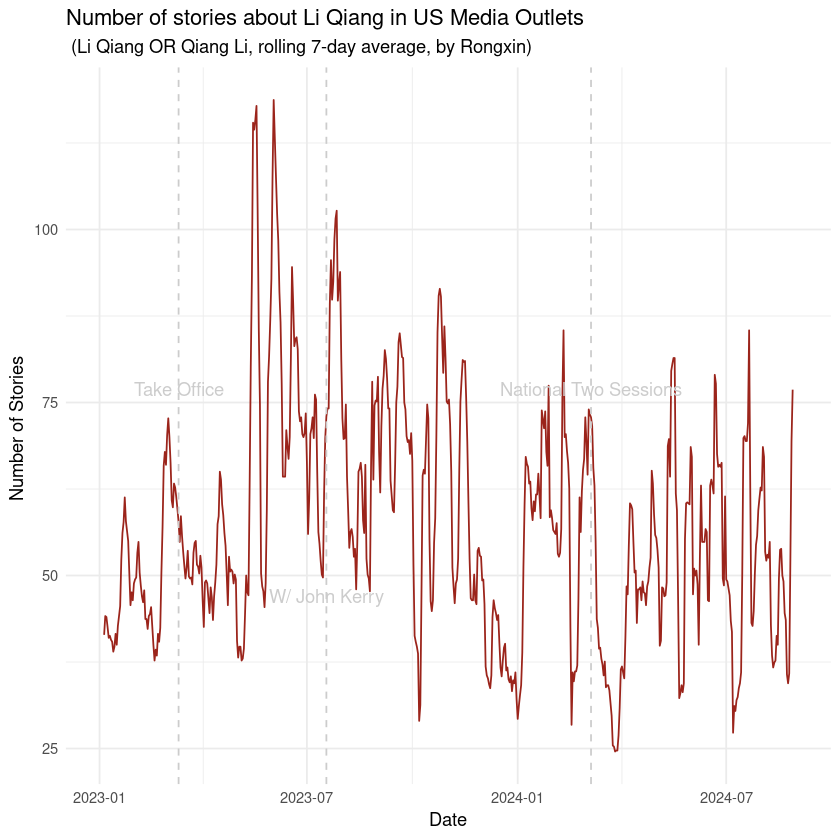

In [67]:
syn_colors <- c("#cccccc", "#9B241B")
g <- ggplot(data.plot, aes(x = publish_date, y = rolling_avg)) +
    geom_line(color = syn_colors[[2]]) +
    # geom_point(color = syn_colors[[2]]) +
    theme_minimal() +
    geom_vline(xintercept = as.Date("2023-03-11"), linetype = "dashed", color = syn_colors[[1]]) +
    geom_vline(xintercept = as.Date("2024-03-05"), linetype = "dashed", color = syn_colors[[1]]) +
    geom_vline(xintercept = as.Date("2023-07-18"), linetype = "dashed", color = syn_colors[[1]]) +
    annotate("text", x = as.Date("2023-07-18"), y = 48, label = "W/ John Kerry", color = syn_colors[[1]], vjust = 1) +
    annotate("text", x = as.Date("2023-03-11"), y = 78, label = "Take Office", color = syn_colors[[1]], vjust = 1) +
    annotate("text", x = as.Date("2024-03-05"), y = 78, label = "National Two Sessions", color = syn_colors[[1]], vjust = 1) +
    # theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(
        title = "Number of stories about Li Qiang in US Media Outlets",
        subtitle = " (Li Qiang OR Qiang Li, rolling 7-day average, by Rongxin)",
        x = "Date",
        y = "Number of Stories "
    )
g


In [68]:
ggsave("./li.qiang.pdf", g, width = 18, height = 6, units = "in", dpi = 300)


Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_line()`).”
